# <b>Section 1: Albums Data Exploration</b>

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data exploration:
- `pandas`: used to store data from .csv/.tsv files and operate functions on DataFrame
- `datetime`: used to format date of data
- `matplotlib`: used to visualize data

In [ ]:
import sys  
sys.path.insert(0, '../../data')
sys.path.insert(0, '../../data/description')

In [27]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### <b><u>Step 2</u>: Import albums data from 'albums_data.tsv' file</b>

In [28]:
pd_album = pd.read_csv('../../data/albums_data.tsv', sep = '\t')

### <b><u>Step 3</u>: Exploratory Data Analysis</b>

Let's take a look at first 10 rows and the main characteristics of dataset.

In [29]:
pd_album.head(10)

,id,name,popularity,available_markets,release_date,total_tracks
0,7lPoGKpCGgdKFAxpudhAH5,Speak Your Mind (Deluxe),72,183,2018-04-27,18
1,0gr5OmB74UhoANEXwYT3gE,Dreamers [Music from the FIFA World Cup Qatar ...,67,183,2022-11-20,1
2,6al2VdKbb6FIz9d7lU7WRB,Proof,85,183,2022-06-10,35
3,6oSxSPOg7Kuitjt2zwP7sU,2002,52,183,2018-04-19,1
4,4uDaEWj8W206qyyyndHri9,2022 Tanging Ain't Dead Cypher,36,183,2022-02-21,1
5,1Ll6pBUUA0uZttCi95oXY5,2022,14,183,2022-10-15,1
6,3Qj2vsFzmaB8jcH6Q60WIG,The Prelude,62,183,2020-07-17,6
7,2emh7ZBzZLeQJwzAfeX1CK,Barbarians in Black (2022 Remix),38,183,2022-10-21,1
8,6mPSjHXiuf2zHA0ssVp8iU,Hayya Hayya (Better Together) [Music from FIFA...,55,182,2022-04-01,1
9,0gX9tkL5njRax8ymWcXARi,Unholy (feat. Kim Petras),88,182,2022-09-22,1


Let's read some description of each column to understand more clearly about data. All of these was included in `albums_data_des.csv`.

In [30]:
albums_data_des = pd.read_csv('../../data/description/albums_data_des.csv')
albums_data_des

,column name,data type,meaning,example
0,id,string,The Spotify ID of the album,7lPoGKpCGgdKFAxpudhAH5
1,name,string,The name of the album,Speak Your Mind (Deluxe)
2,popularity,int,"""The popularity of the album. The value will ...",72
3,available_markets,int,The number of markets (countries) which the a...,183
4,release_date,datetime,The day when the album was released,"""2018-04-27"""
5,total_tracks,int,The number of tracks which the album contain,18


Next, let's check how many rows and columns in our DataFrame.

In [31]:
rows, columns = pd_album.shape
rows, columns

(3000, 6)

In [32]:
pd_album.describe()

,popularity,available_markets,total_tracks
count,3000.000000,3000.000000,3000.000000
mean,25.269000,153.741333,32.543000
std,20.136496,45.390166,59.205737
min,0.000000,10.000000,1.000000
25%,7.000000,95.000000,4.000000
50%,21.000000,183.000000,15.000000
75%,40.000000,183.000000,40.000000
max,91.000000,183.000000,494.000000


We are going to show information of the DataFrame.

In [33]:
pd_album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3000 non-null   object
 1   name               3000 non-null   object
 2   popularity         3000 non-null   int64 
 3   available_markets  3000 non-null   int64 
 4   release_date       3000 non-null   object
 5   total_tracks       3000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 140.8+ KB


Datatype of each columns.

In [34]:
dtypes = pd_album.dtypes
dtypes

id                   object
name                 object
popularity            int64
available_markets     int64
release_date         object
total_tracks          int64
dtype: object

Let's count the number of null and missing data.

In [35]:
pd_album.isna().sum()

id                   0
name                 0
popularity           0
available_markets    0
release_date         0
total_tracks         0
dtype: int64

Check how many albums are duplicated and need to be removed later.

In [61]:
print("There are", pd_album.duplicated().sum(), "rows are duplicated.") 

There are 1761 rows are duplicated.


We have recognized that the datatype of column `release_date` do not meet our need. Therefore, we have to convert release_date column from datetime type to Timestamp type.

In [37]:
pd_album['release_date'] = pd.to_datetime(pd_album['release_date'])
print('Ex:', pd_album['release_date'][1])

Ex: 2022-11-20 00:00:00


### <b><u>Step 4</u>: Count occurrences of each albums in 3000 rows of raw data</b>

- Count duplication of each albums by pd.groupby().
- Drop irrelevant columns.
- Rename the counted value column from "size" to "occurrences".
- Sort "occurrences" by descending order.

In [38]:
album_occur = pd_album.groupby(pd_album.columns.tolist(), as_index = False).size()
album_occur = album_occur.drop(['popularity', 'available_markets', 'release_date', 'total_tracks'], axis = 1)
album_occur = album_occur.rename(columns = {'size': 'occurrences'})
album_occur = album_occur.sort_values(by = 'occurrences', ascending = False, ignore_index = True)
album_occur.head(10)

,id,name,occurrences
0,6tMXhYSWXf3xcbrEQgNckz,Capodanno 2022 Baila! Latin Hits,66
1,2HQ1QwLkpqd5Jn0u5oskim,this was 2022 the hits,48
2,7nII01joxrmJU3KQPLejxV,2022 Rewind,41
3,6QIWJVJPPgAA5c4aIb1zCA,SKZ2020,40
4,69tpCFA80jyssTOIHDQQO8,Capodanno 2022 Pop Hits,38
5,2hftqbjw8Ka5Z4TbawH8UP,Capodanno 2022 Dance Hits,34
6,6RINHoeZp00BYfcCqQyRkE,2022 Thanksgiving Dance Party,34
7,7zva9wg87euC958GKmscJz,Festa di Capodanno 2022,30
8,0xkKzTdvWzS8DA4hzyQijn,Let It Snow 2022,25
9,7bX3RQl9L4oCiVT81Fuqes,HUMAN (Live Concert 2020),25


### <b><u>Step 5</u>: Drop duplication to clean the data</b>

In [39]:
albums_data = pd_album.drop_duplicates(subset = ['id'], keep = 'first', inplace = False)

Okay, it seems like our data are cleaner.

In [40]:
albums_data.head(10)

,id,name,popularity,available_markets,release_date,total_tracks
0,7lPoGKpCGgdKFAxpudhAH5,Speak Your Mind (Deluxe),72,183,2018-04-27,18
1,0gr5OmB74UhoANEXwYT3gE,Dreamers [Music from the FIFA World Cup Qatar ...,67,183,2022-11-20,1
2,6al2VdKbb6FIz9d7lU7WRB,Proof,85,183,2022-06-10,35
3,6oSxSPOg7Kuitjt2zwP7sU,2002,52,183,2018-04-19,1
4,4uDaEWj8W206qyyyndHri9,2022 Tanging Ain't Dead Cypher,36,183,2022-02-21,1
5,1Ll6pBUUA0uZttCi95oXY5,2022,14,183,2022-10-15,1
6,3Qj2vsFzmaB8jcH6Q60WIG,The Prelude,62,183,2020-07-17,6
7,2emh7ZBzZLeQJwzAfeX1CK,Barbarians in Black (2022 Remix),38,183,2022-10-21,1
8,6mPSjHXiuf2zHA0ssVp8iU,Hayya Hayya (Better Together) [Music from FIFA...,55,182,2022-04-01,1
9,0gX9tkL5njRax8ymWcXARi,Unholy (feat. Kim Petras),88,182,2022-09-22,1


### <b><u>Step 6</u>: Data Visualization</b>

#### Visualize top 10 albums' occurrences among 3000 songs.

<AxesSubplot: ylabel='name'>

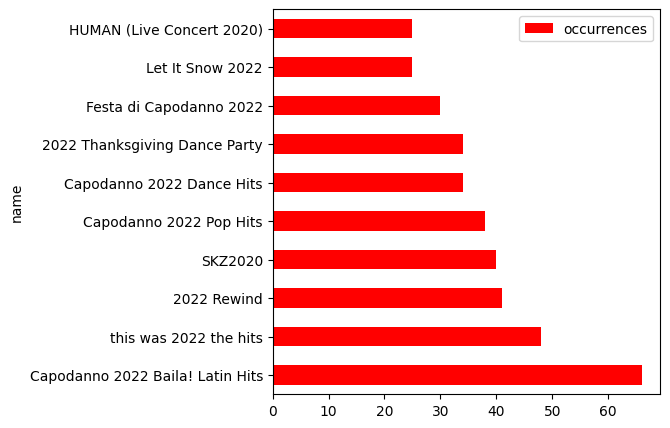

In [41]:
top10_occurrences = album_occur[['name', 'occurrences']].nlargest(n = 10, columns = ['occurrences'])
top10_occurrences.set_index('name').plot.barh(figsize = (5, 5), color = "red")

#### Visualize top 10 albums' total tracks.

<AxesSubplot: ylabel='name'>

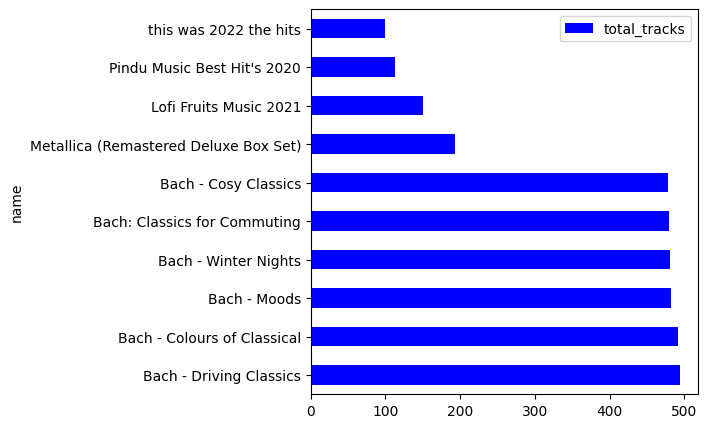

In [42]:
top10_notracks = albums_data[['name', 'total_tracks']].nlargest(n = 10, columns = ['total_tracks'])
top10_notracks.set_index('name').plot.barh(figsize = (5, 5), color = "blue")

#### List all albums have popularity over 80.

In [62]:
albums_data[albums_data['popularity'] > 80].sort_values(by = ['popularity'], ascending = False)

,id,name,popularity,available_markets,release_date,total_tracks
117,5r36AJ6VOJtp00oxSkBZ5h,Harry's House,91,183,2022-05-20,13
9,0gX9tkL5njRax8ymWcXARi,Unholy (feat. Kim Petras),88,182,2022-09-22,1
115,7M842DMhYVALrXsw3ty7B3,I'm Good (Blue),86,182,2022-08-26,2
2,6al2VdKbb6FIz9d7lU7WRB,Proof,85,183,2022-06-10,35
152,1nAQbHeOWTfQzbOoFrvndW,Planet Her,85,183,2021-06-25,14
2151,0S0KGZnfBGSIssfF54WSJh,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",84,183,2019-03-29,14
17,2pqdSWeJVsXAhHFuVLzuA8,As It Was,82,182,2022-03-31,1
111,1HMLpmZAnNyl9pxvOnTovV,NewJeans 1st EP 'New Jeans',81,183,2022-08-01,4


#### Visualize top 10 albums' popularity.

<AxesSubplot: ylabel='name'>

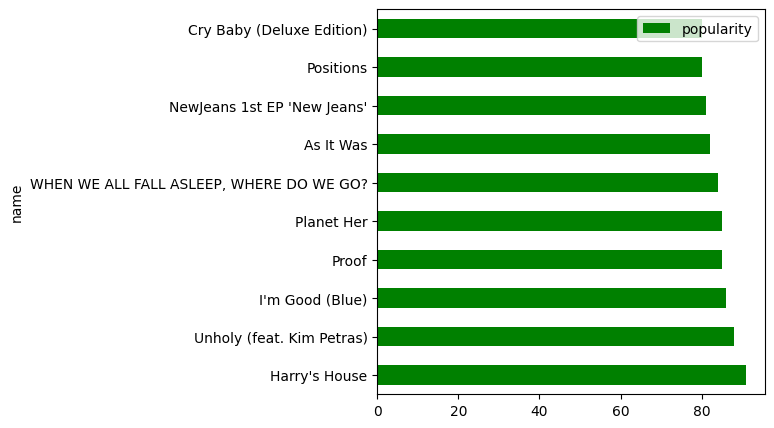

In [44]:
top10_popularity = albums_data[['name', 'popularity']].nlargest(n = 10, columns = ['popularity'])
top10_popularity.set_index('name').plot.barh(figsize = (5, 5), color = "green")

### <b><u>Step 7</u>: Advanced exploration on the dataset</b>

#### Show all existing albums' releasing-years.

In [45]:
albums_data['release_date'].dt.year.sort_values().unique()

array([1960, 1970, 1971, 1974, 1979, 1980, 1981, 1982, 1983, 1984, 1988,
       1990, 1991, 1994, 1995, 1996, 1997, 1999, 2000, 2001, 2002, 2004,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022], dtype=int64)

Visualize the number of albums released each years from 1960 to 2022.

<AxesSubplot: >

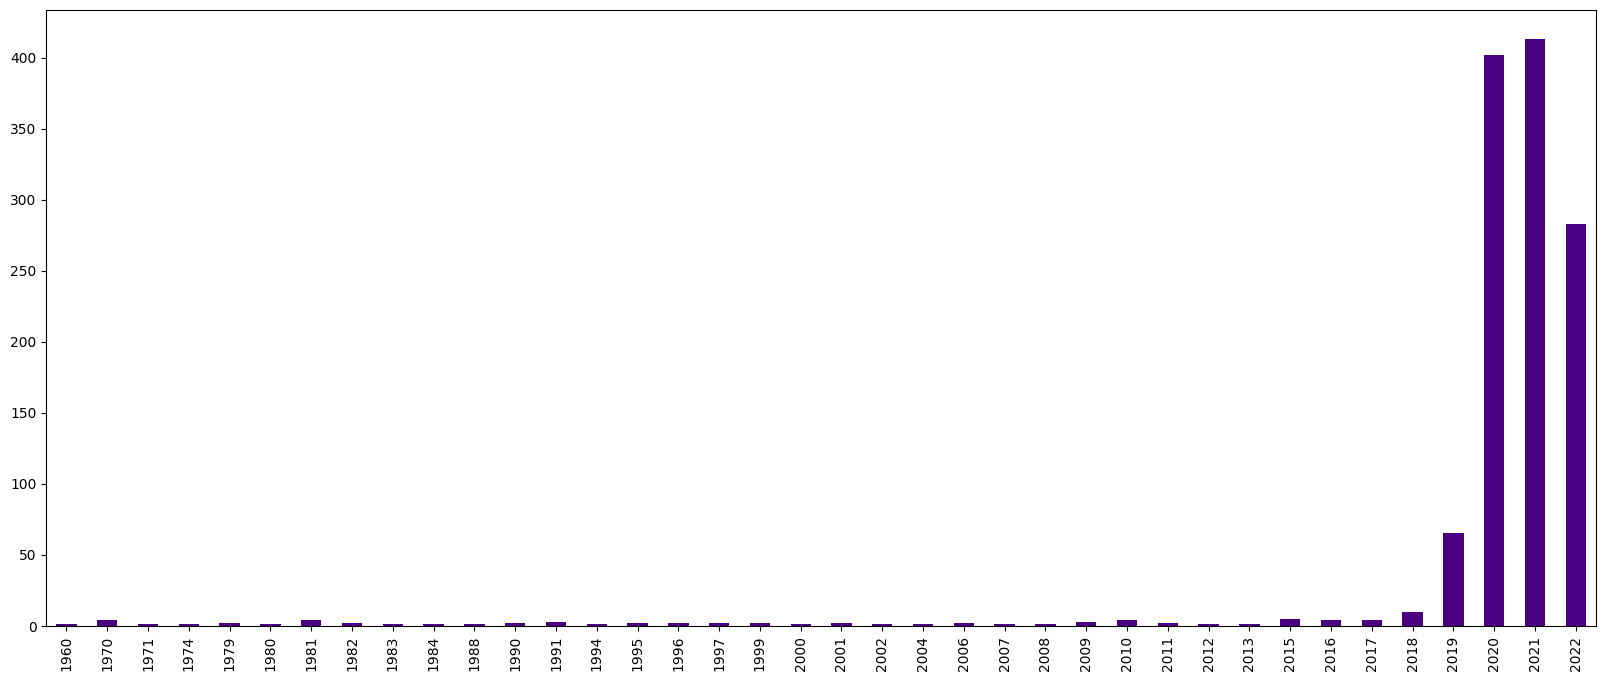

In [46]:
num_albums_each_years = albums_data['release_date'].dt.year.value_counts().sort_index(ascending = True)
num_albums_each_years.plot.bar(figsize = (20, 8), color = 'indigo')

#### <b>The album with the highest popularity in 2022</b>
- Get all albums which released in 2022.

In [47]:
albums_2022 = albums_data[['id', 'name', 'popularity', 'release_date']].where(albums_data['release_date'].dt.year == 2022)
albums_2022.dropna(inplace = True)
albums_2022.sort_values(by = 'popularity', ascending = False, ignore_index = True).head(10)

,id,name,popularity,release_date
0,5r36AJ6VOJtp00oxSkBZ5h,Harry's House,91.0,2022-05-20
1,0gX9tkL5njRax8ymWcXARi,Unholy (feat. Kim Petras),88.0,2022-09-22
2,7M842DMhYVALrXsw3ty7B3,I'm Good (Blue),86.0,2022-08-26
3,6al2VdKbb6FIz9d7lU7WRB,Proof,85.0,2022-06-10
4,2pqdSWeJVsXAhHFuVLzuA8,As It Was,82.0,2022-03-31
5,1HMLpmZAnNyl9pxvOnTovV,NewJeans 1st EP 'New Jeans',81.0,2022-08-01
6,3u0ggfmK0vjuHMNdUbtaa9,ANTIFRAGILE,79.0,2022-10-17
7,3NZ94nQbqimcu2i71qhc4f,BETWEEN 1&2,75.0,2022-08-26
8,0Gmf4pfe0POEQq2FgGAj2q,ODDINARY,74.0,2022-03-18
9,36bNKiiUjxUCaAO7QtUVfi,KU LO SA - A COLORS SHOW,74.0,2022-06-10


- Query to get the album with the highest popularity in 2022.

In [48]:
display(albums_2022.loc[(albums_2022['popularity'] >= albums_2022['popularity'].max()), ['id', 'name', 'popularity', 'release_date']])

,id,name,popularity,release_date
117,5r36AJ6VOJtp00oxSkBZ5h,Harry's House,91.0,2022-05-20


#### <b>The album with the highest popularity in 2021</b>
- Get all albums which released in 2021.

In [49]:
albums_2021 = albums_data[['id', 'name', 'popularity', 'release_date']].where(albums_data['release_date'].dt.year == 2021)
albums_2021.dropna(inplace = True)
albums_2021.sort_values(by = 'popularity', ascending = False, ignore_index = True).head(10)

,id,name,popularity,release_date
0,1nAQbHeOWTfQzbOoFrvndW,Planet Her,85.0,2021-06-25
1,0VaHnwzDug4AcDkejYDUl5,Sunroof,78.0,2021-12-03
2,1YgekJJTEueWDaMr7BYqPk,An Evening With Silk Sonic,77.0,2021-11-11
3,4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),76.0,2021-07-09
4,270o30h7cAlEhBnbuSpFZq,El Dorado,73.0,2021-03-26
5,1bTgKomQYSkKYPD9UI9W4b,Enemy (with JID) [from the series Arcane Leagu...,73.0,2021-10-28
6,3zjKITMp5FHj5aqtWWXrxH,Todo De Ti,70.0,2021-05-20
7,5Zdr9vactwnJH4Vpe9Mid9,The Chaos Chapter: FREEZE,69.0,2021-05-31
8,6o86bV7TAt5x4exc2qLDqC,Actual Life (April 14 - December 17 2020),68.0,2021-04-15
9,35DIb6j45YmbHAfyN7HgaG,Lofi Fruits Music 2021,68.0,2021-06-09


- Query to get the album with the highest popularity in 2021.

In [50]:
display(albums_2021.loc[(albums_2021['popularity'] >= albums_2021['popularity'].max()), ['id', 'name', 'popularity', 'release_date']])

,id,name,popularity,release_date
152,1nAQbHeOWTfQzbOoFrvndW,Planet Her,85.0,2021-06-25


#### <b>The album with the highest popularity in 2020</b>
- Get all albums which released in 2020.

In [51]:
albums_2020 = albums_data[['id', 'name', 'popularity', 'release_date']].where(albums_data['release_date'].dt.year == 2020)
albums_2020.dropna(inplace = True)
albums_2020.sort_values(by = 'popularity', ascending = False, ignore_index = True).head(10)

,id,name,popularity,release_date
0,3euz4vS7ezKGnNSwgyvKcd,Positions,80.0,2020-10-30
1,1zHR48K6XtWYm6bhrw4J6C,TAKE TIME,76.0,2020-03-27
2,4otkd9As6YaxxEkIjXPiZ6,Music To Be Murdered By,75.0,2020-01-17
3,7IyoGB8J31fvQDwGtHAq9m,Eternal Atake,72.0,2020-03-06
4,63iWSELt9V1kV6RSMxN7Ii,Changes,72.0,2020-02-14
5,0fEO7g2c5onkaXsybEtuD2,Eternal Atake (Deluxe) - LUV vs. The World 2,71.0,2020-03-13
6,2p9gK2BcdrloHNJwarc9gc,death bed (coffee for your head),71.0,2020-02-08
7,6QIWJVJPPgAA5c4aIb1zCA,SKZ2020,68.0,2020-03-18
8,5jlE1zlhT3mEWw0mRpN920,Chilombo,65.0,2020-03-06
9,1XMw3pBrYeXzNXZXc84DNw,Savage Love (Laxed - Siren Beat),64.0,2020-06-11


- Query to get the album with the highest popularity in 2020.

In [52]:
display(albums_2020.loc[(albums_2020['popularity'] >= albums_2020['popularity'].max()), ['id', 'name', 'popularity', 'release_date']])

,id,name,popularity,release_date
1104,3euz4vS7ezKGnNSwgyvKcd,Positions,80.0,2020-10-30


#### Visualize the number of albums based on popularity.

<AxesSubplot: >

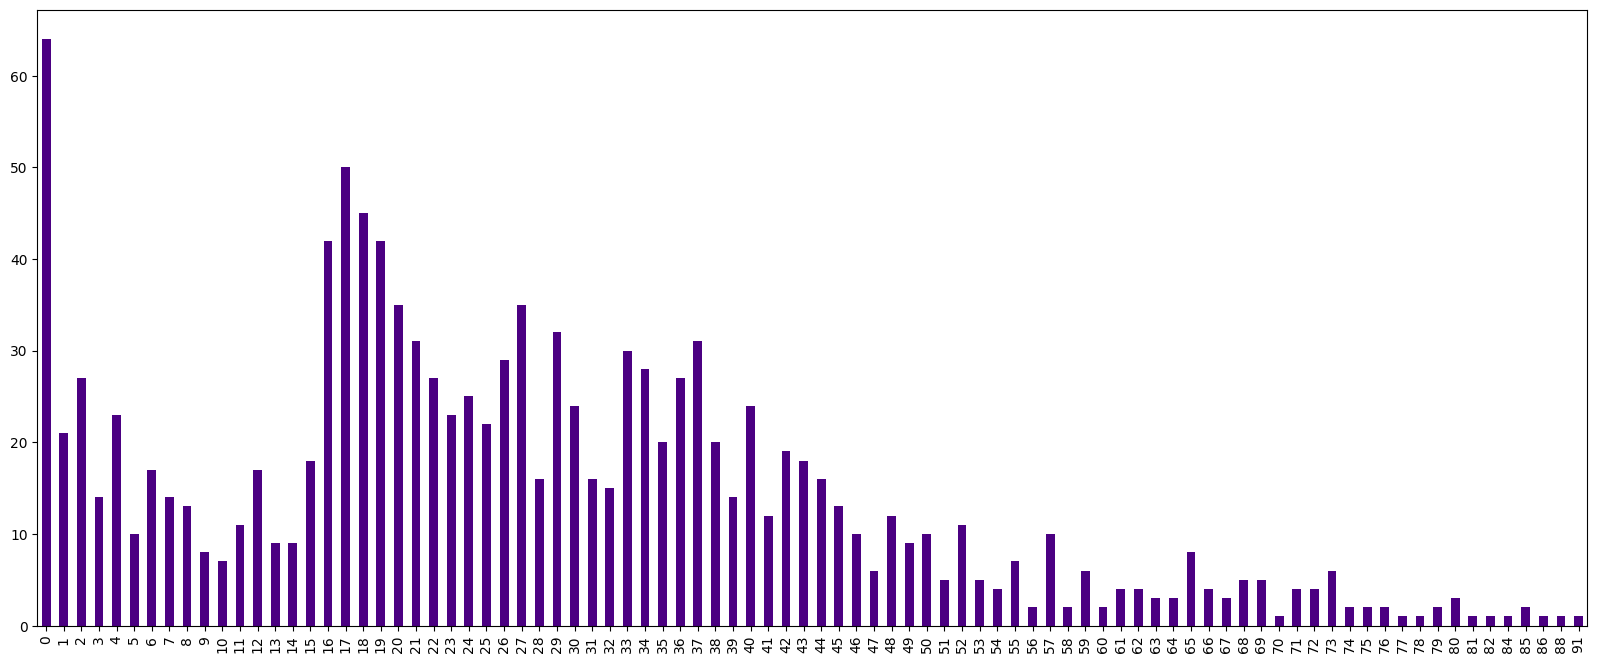

In [64]:
num_albums_each_popularity = albums_data['popularity'].value_counts().sort_index(ascending = True)
num_albums_each_popularity.plot.bar(figsize = (20, 8), color = 'indigo')